<a href="https://colab.research.google.com/github/Omkarnagare87/Data-Analysis-projects/blob/main/Land%20Price%20Prediction%20Data%20analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###6_Exploring Mean, Median, Quartile


### Import Library

In [1]:
import pandas as pd #useful for loading the dataset

### Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


### Load Dataset

In [3]:
dataset = pd.read_csv('Dataset.csv')
datasetwithNaN = dataset
dataset

,land,price
0,1000,2245.0
1,2000,4575.0
2,3000,6874.0
3,4000,8878.0
4,5000,NaN
5,6000,12457.0
6,7000,14785.0
7,8000,16785.0
8,10000,2078900.0


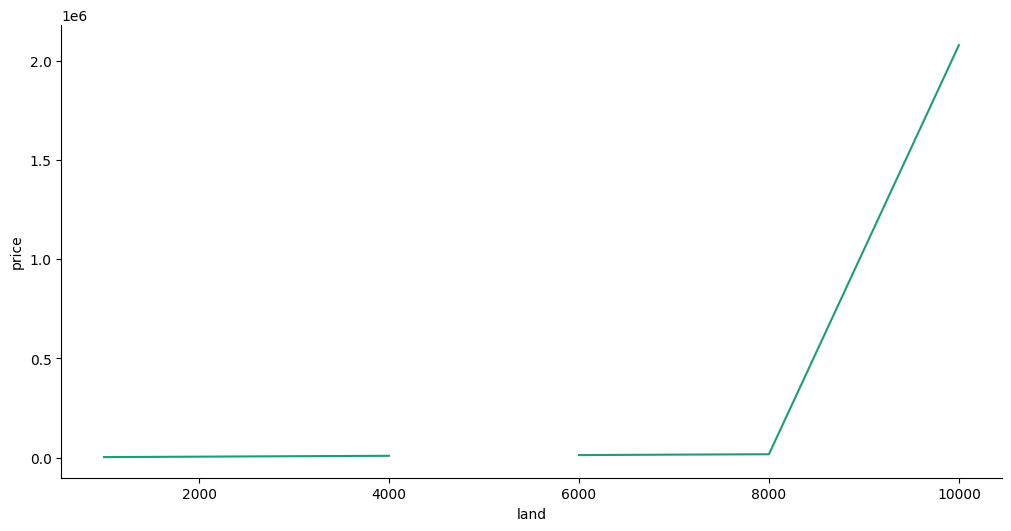

In [5]:
# @title land vs price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['land']
  ys = series['price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('land', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('land')
_ = plt.ylabel('price')

### Load Summarize

In [4]:
print(dataset.shape)
print(dataset.describe())

(9, 2)
               land         price
count      9.000000  8.000000e+00
mean    5111.111111  2.681874e+05
std     2934.469477  7.316554e+05
min     1000.000000  2.245000e+03
25%     3000.000000  6.299250e+03
50%     5000.000000  1.066750e+04
75%     7000.000000  1.528500e+04
max    10000.000000  2.078900e+06


###Checking for NaN Values

In [6]:
dataset.isna().any()

,0
land,False
price,True


### Filling NaN values with the Mean  
###Problem - New value becomes high coz of outlier (Large value scale)

In [7]:
MeandatasetNotNan = dataset.price.fillna(dataset.price.mean())
MeandatasetNotNan

,price
0,2245.000
1,4575.000
2,6874.000
3,8878.000
4,268187.375
5,12457.000
6,14785.000
7,16785.000
8,2078900.000


### Solution - Filling NaN value with Median

In [8]:
MediandatasetNotNan = dataset.price.fillna(dataset.price.median())
MediandatasetNotNan

,price
0,2245.0
1,4575.0
2,6874.0
3,8878.0
4,10667.5
5,12457.0
6,14785.0
7,16785.0
8,2078900.0


###Identifying and removing the outlier - Huge difference in value


In [9]:
dataset.describe()

,land,price
count,9.000000,8.000000e+00
mean,5111.111111,2.681874e+05
std,2934.469477,7.316554e+05
min,1000.000000,2.245000e+03
25%,3000.000000,6.299250e+03
50%,5000.000000,1.066750e+04
75%,7000.000000,1.528500e+04
max,10000.000000,2.078900e+06


In [10]:
percentile = dataset.price.quantile(1.0)
percentile

np.float64(2078900.0)

In [11]:
datasetNoOutlier = dataset[dataset.price<percentile]
datasetNoOutlier

,land,price
0,1000,2245.0
1,2000,4575.0
2,3000,6874.0
3,4000,8878.0
5,6000,12457.0
6,7000,14785.0
7,8000,16785.0


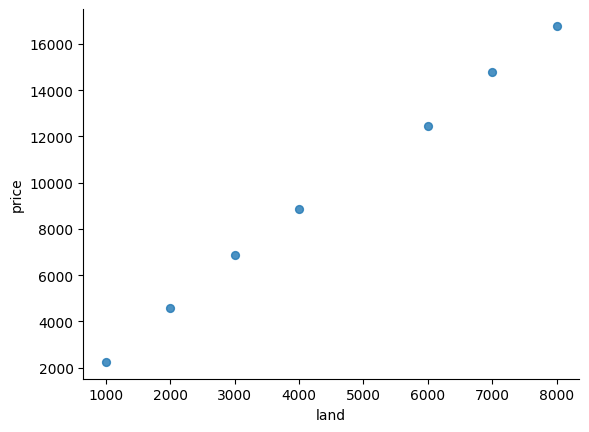

In [12]:
# @title land vs price

from matplotlib import pyplot as plt
datasetNoOutlier.plot(kind='scatter', x='land', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)